In [207]:
BUFFA_LENGTH = Int(stream.samplerate) * 5

220500

In [208]:
buf = read(stream, BUFFA_LENGTH)

220500-frame, 2-channel SampleBuf{Float32, 2}
5.0s sampled at 44100.0Hz
▃▂▄▄▄▅▄▄▃▃▃▃▄▄▅▆▆▇▇▆▇▇▇▇▆▆▆▆▄▆▅▆▆▆▆▆▆▇▆▆▆▆▅▆▆▆▅▆▆▆▆▆▆▇▅▆▆▆▆▆▇▅▇▇▆▆▅▅▆▆▅▆▆▅▃▃▃▄▄▄
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

In [209]:
l_channel = buf.data[:, 1];
shift_sec = 0.1
shift_frame = Int(shift_sec * stream.samplerate)
output_data = [l_channel; zeros(shift_frame)] .+ [zeros(shift_frame); l_channel] ./ 2
output_buf = SampleBuf(output_data, 44100);

In [129]:
using Markdown

In [131]:
"""
# JuliaでオーディオプログラミングしてZoom用の簡易エフェクターをつくるぞ💪  by ㌐㍓㌥㌑

## by phigasui

## ✨Talk-13✨

""" |> Markdown.parse

In [211]:
write(stream, output_buf)

224910

## 自己紹介

In [5]:
using Images
using Plots

In [6]:
abstract type 人間 end
struct Phigasui <: 人間 end

所属(::Phigasui)::String = "Increments プロダクト開発グループ Qiita Team 開発チーム"
入社年(::Phigasui)::Int = 2016
公式HP(::Phigasui)::String = "https://phigasui.com";

In [7]:
phigasui = Phigasui();

In [8]:
join([所属, 入社年, 公式HP] .|> f -> "- $(Symbol(f)): $(f(phigasui))", "\n") |> Markdown.parse

  * 所属: Increments プロダクト開発グループ Qiita Team 開発チーム
  * 入社年: 2016
  * 公式HP: https://phigasui.com


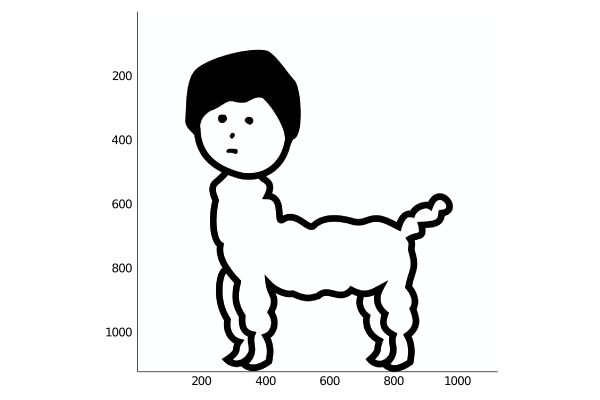

In [9]:
img = mktemp() do fn,f
    download("https://github.com/phigasui/alpagasui-graphics/blob/master/jpg/alpagasui.jpg?raw=true", fn)
    load(fn)
end
plot(img)

## このLTではマイクで拾った音をいじって Zoom へ出力するまでを目指します

### ながら Julia のイケてるポイントを紹介

## Julia って？

### 超イケてるプログラミング言語

- 速い
- ラク
- カッコイイ

### 真面目な特徴

- JIT コンパイルでスクリプト言語だけど実行速度が速い(ループの処理が早い)
- 動的型付なので楽
    - かつ型宣言できるので堅牢にもかける
- 数式ライクな式や関数定義
- 多重ディスパッチ

## オーディオプログラミングって？

### サウンドプログラミング、音響プログラミング

## プログラミングをして音をいじります

## 音とは

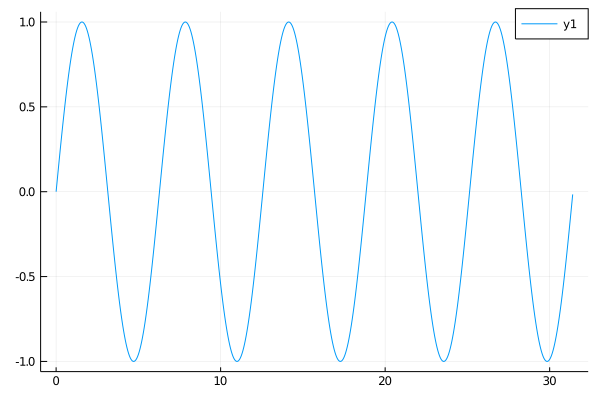

In [10]:
plot(sin, 0:0.05:pi*10)

## 例: sin波、正弦波

### (Julia では sin とか pi とかBaseパッケージで用意されてる🎉)

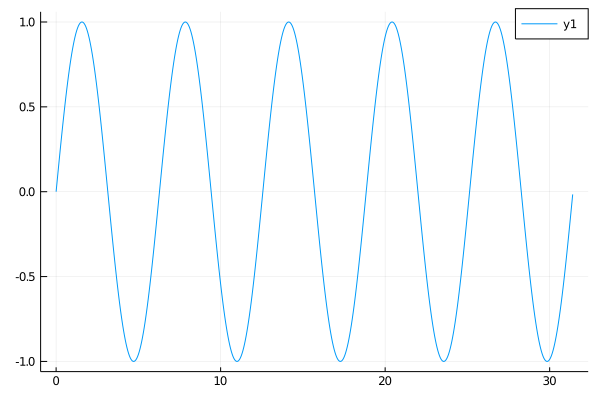

In [10]:
plot(sin, 0:0.05:pi*10)

- 音量
    - 振幅 波の大きさ
- 音高
    - 周波数 1秒間に何回波打つか
- 音色
    - 周波数特性 波の形

In [132]:
using SampledSignals
using PortAudio

In [136]:
output_buf = SampleBuf(sin.(0:0.05:2205) ./ 10 , 44100)

44101-frame, 1-channel SampleBuf{Float64, 1}
1.0000226757369615s sampled at 44100.0Hz
▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅

In [137]:
stream = PortAudioStream("Komplete Audio 6", "Soundflower (2ch)")

PortAudioStream{Float32}
  Samplerate: 44100.0Hz

  2 channel sink: "Soundflower (2ch)"
  2 channel source: "Komplete Audio 6"

In [141]:
write(stream, output_buf)

44101

### 綺麗な音

## デジタル音声

- サンプリング周波数
    - 1秒間に何個標本をとるか
    - サンプリング周波数の1/2までの周波数しかとれない
- 量子化bit数
    - 高さを何段階で取るか
- チャンネル
    - L, R

## やっていき💪

### まずは音声のI/O

### Macでは仮装オーディをデバイスの SoundFlower というアプリをつかいます

- Julia でマイクの入力を受け取る
- Julia で出力を SoundFlower へ送る
- Zoom で入力を SoundFlower にする

といった流れです


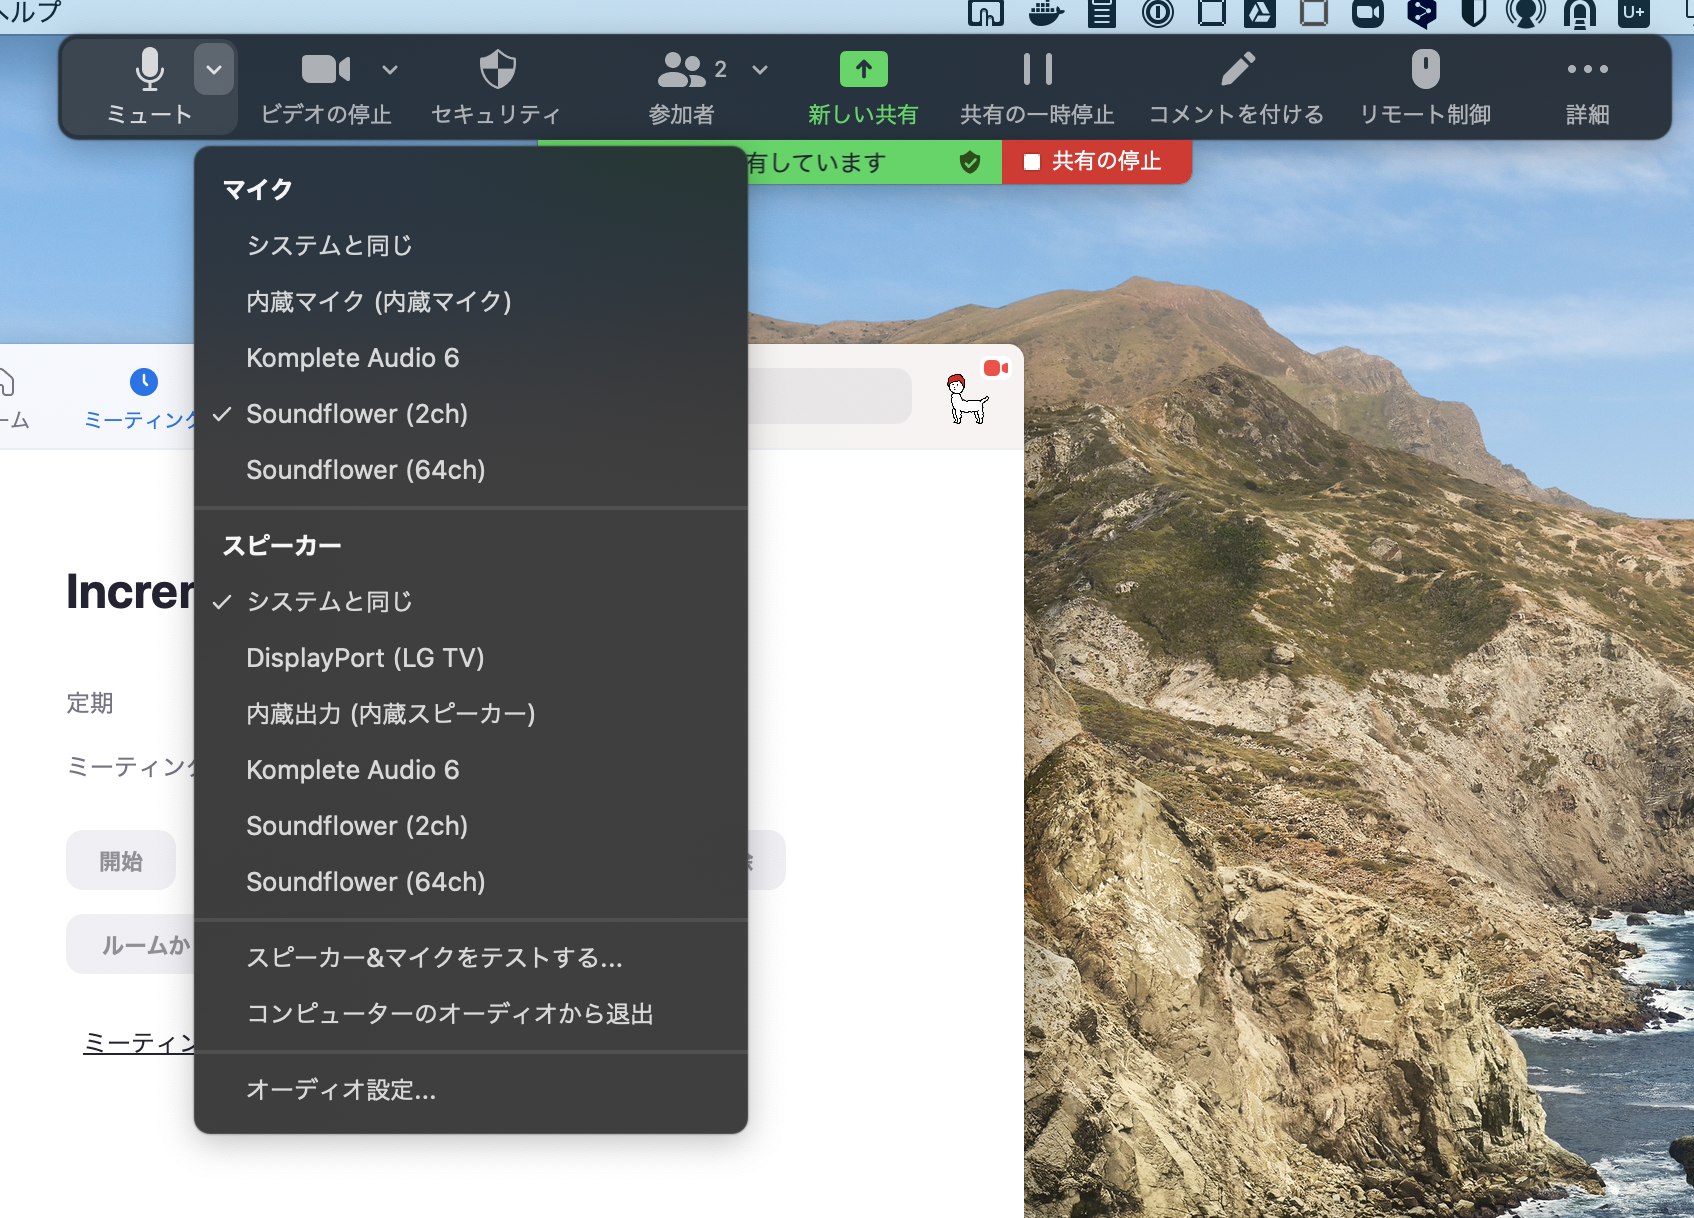

In [3]:
using PortAudio

In [4]:
devices = PortAudio.devices()

6-element Array{PortAudio.PortAudioDevice,1}:
 PortAudio.PortAudioDevice("Built-in Microphone", "Core Audio", 2, 0, 44100.0, 0, 0.0029478458049886623, 0.01, 0.01310657596371882, 0.1)
 PortAudio.PortAudioDevice("Built-in Output", "Core Audio", 0, 2, 44100.0, 1, 0.01, 0.010929705215419501, 0.1, 0.02108843537414966)
 PortAudio.PortAudioDevice("DisplayPort", "Core Audio", 0, 2, 44100.0, 2, 0.01, 0.002653061224489796, 0.1, 0.012811791383219955)
 PortAudio.PortAudioDevice("Komplete Audio 6", "Core Audio", 6, 6, 44100.0, 3, 0.01, 0.0045578231292517, 0.1, 0.014716553287981859)
 PortAudio.PortAudioDevice("Soundflower (2ch)", "Core Audio", 2, 2, 44100.0, 4, 0.01, 0.0014512471655328798, 0.1, 0.011609977324263039)
 PortAudio.PortAudioDevice("Soundflower (64ch)", "Core Audio", 64, 64, 44100.0, 5, 0.01, 0.0014512471655328798, 0.1, 0.011609977324263039)

### 接続されているオーディをデバイスを取得

In [5]:
stream = PortAudioStream(devices[4], devices[5])

PortAudioStream{Float32}
  Samplerate: 44100.0Hz

  2 channel sink: "Soundflower (2ch)"
  2 channel source: "Komplete Audio 6"

### 入出力に使うデバイスを指定する

In [137]:
stream = PortAudioStream("Komplete Audio 6", "Soundflower (2ch)")

PortAudioStream{Float32}
  Samplerate: 44100.0Hz

  2 channel sink: "Soundflower (2ch)"
  2 channel source: "Komplete Audio 6"

### さっきはこんな書き方してた

In [143]:
methods(PortAudioStream)

# 14 methods for type constructor:
[1] (::Type{PortAudioStream})() in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:207
[2] (::Type{PortAudioStream})(device::PortAudio.PortAudioDevice) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:199
[3] (::Type{PortAudioStream})(indev::PortAudio.PortAudioDevice, outdev::PortAudio.PortAudioDevice) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:154
[4] (::Type{PortAudioStream})(indev::PortAudio.PortAudioDevice, outdev::PortAudio.PortAudioDevice, inchans) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:154
[5] (::Type{PortAudioStream})(indev::PortAudio.PortAudioDevice, outdev::PortAudio.PortAudioDevice, inchans, outchans; eltype, samplerate, latency, warn_xruns, recover_xruns) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:154
[6] (::Type{PortAudioStream})(device::AbstractString) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:202
[7] (::Type{PortAudioStream})(indevname::AbstractString, outdevname::AbstractString, args...; kwargs...) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:176
[8] (::Type{PortAudioStream})(device::PortAudio.PortAudioDevice, inchans) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:199
[9] (::Type{PortAudioStream})(device::PortAudio.PortAudioDevice, inchans, outchans; kwargs...) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:199
[10] (::Type{PortAudioStream})(device::AbstractString, inchans) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:202
[11] (::Type{PortAudioStream})(device::AbstractString, inchans, outchans; kwargs...) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:202
[12] (::Type{PortAudioStream})(fn::Function, args...; kwargs...) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:216
[13] (::Type{PortAudioStream})(inchans) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:207
[14] (::Type{PortAudioStream})(inchans, outchans; kwargs...) in PortAudio at /Users/h-1456/.julia/packages/PortAudio/JRDxf/src/PortAudio.jl:207

### 多重ディスパッチ

In [6]:
BUFFA_LENGTH = Int(stream.samplerate)

44100

In [146]:
buf = read(stream, BUFFA_LENGTH)

44100-frame, 2-channel SampleBuf{Float32, 2}
1.0s sampled at 44100.0Hz
▂▁▂▂▂▂▂▂▁▂▄▅▄▄▄▅▄▄▄▅▅▅▅▅▅▆▇█▇▇▇▇▇▇▇▇▇▇▇▆▇▆▆▆▆▆▅▅▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▇▆▆▆▆▆▅▄▄▄▃▂▂▄▃▄▄
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

### マイクからの入力を得る

In [147]:
write(stream, buf)

44100

### 仮想オーディをデバイスに出力！

### データを見てみる

In [148]:
l_channel, r_channel = buf.data[:, 1], buf.data[:, 2]

(Float32[-0.002065897, -0.0020942688, -0.0021635294, -0.002205968, -0.0021650791, -0.0022232533, -0.0022213445, -0.002289176, -0.0023391233, -0.002374649  …  0.019534351, 0.019703032, 0.019788384, 0.019899726, 0.019943237, 0.019592049, 0.019767165, 0.019903421, 0.020044329, 0.020056369], Float32[5.6042336f-6, 9.53814f-6, 8.4652565f-6, 9.418931f-6, 1.0014977f-5, 8.703675f-6, -1.3099052f-6, 8.226838f-6, -3.5748817f-6, 6.20028f-6  …  -6.7949295f-6, -9.536743f-7, 2.2888184f-5, 1.2040138f-5, 9.536743f-7, -5.9604645f-6, 2.6464462f-5, 1.41859055f-5, -8.34465f-6, -5.841255f-6])

### チャンネルを分解

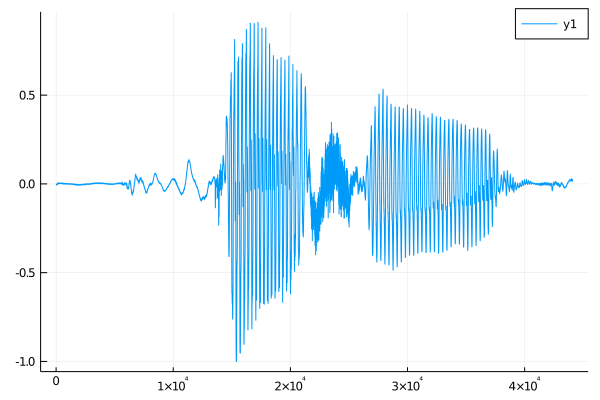

In [149]:
plot( l_channel)

## ピッチシフト

### ピッチ = 音高

### ピッチシフトの考え方

- 周波数を高くすると音が高くなる
    - 信号を間引いて縮める
        - 再生時間が短くなる

- タイムシフトして再生時間を元に戻す

### 正弦波で見てみよう

In [150]:
data = sin.(0:0.05:6pi);

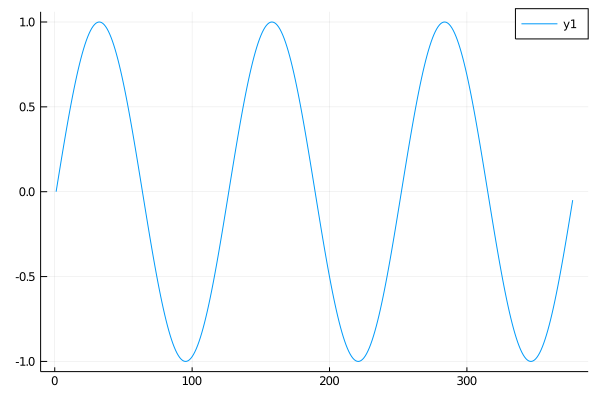

In [151]:
plot(data)

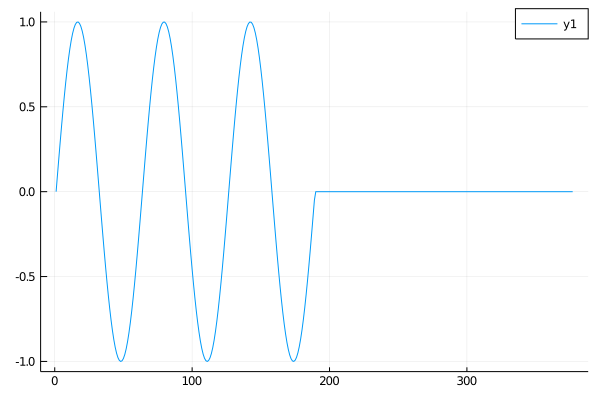

In [152]:
plot([data[1:2:length(data)]; zeros(Int(floor(length(data)/2)))])

### 間引くと短くなっちゃう

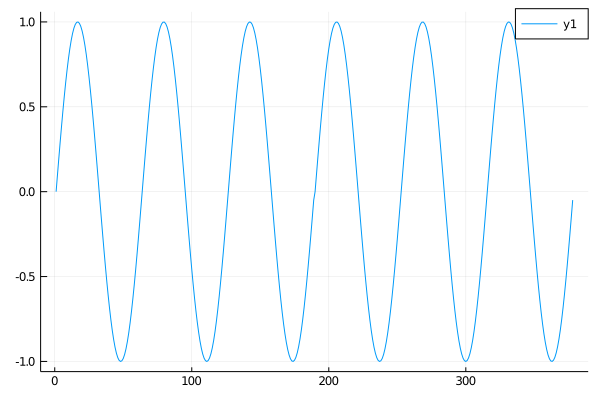

In [153]:
plot([data[1:2:length(data)]; data[1:2:length(data)]])

### 後ろにコピーしてくっつけて伸ばす

### 音を読み込む

In [154]:
BUFFA_LENGTH = Int(stream.samplerate)

44100

In [155]:
 buf = read(stream, BUFFA_LENGTH)

44100-frame, 2-channel SampleBuf{Float32, 2}
1.0s sampled at 44100.0Hz
▃▂▃▂▂▂▃▄▃▄▄▄▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▇▆▆▆▆▆▅▅▅▆▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▄▃▃▃▄▄▄▃▃▄▄▄▄
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

In [156]:
write(stream, buf)

44100

### タイムシフトする時のフレーム幅

In [157]:
frame_sec = 0.05

0.05

In [158]:
frame = frame_sec * stream.samplerate |> floor |> Int

2205

#### 50msec とっておかないと低音を拾いきれない

### 信号を間引く

In [159]:
l_channel = buf.data[:, 1];

In [160]:
output_data = l_channel[1:2:length(l_channel)];

In [161]:
output_buf = SampleBuf(output_data, 44100)

22050-frame, 1-channel SampleBuf{Float32, 1}
0.5s sampled at 44100.0Hz
▃▂▃▂▂▂▃▄▃▄▄▄▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▇▆▆▆▆▆▅▅▅▆▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▄▃▃▃▄▄▄▃▃▄▄▄▄

In [162]:
write(stream, output_buf)

22050

### タイムストレッチを追加

In [166]:
output_data = [[l_channel[(i-1)*frame+1:2:(i-1)*frame+frame]; l_channel[(i-1)*frame+1:2:(i-1)*frame+frame]] for i=1:Int(floor(length(l_channel)/frame))] |> Iterators.flatten |> collect;

In [167]:
output_buf = SampleBuf(output_data, 44100)

44120-frame, 1-channel SampleBuf{Float32, 1}
1.000453514739229s sampled at 44100.0Hz
▃▃▃▃▂▄▂▄▄▄▄▄▅▆▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▆▇▆▇▆▇▆▆▆▆▆▅▇▅▇▇▇▇▇▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▃▄▃▄▄▄▄▃▄▄▄▄

In [168]:
write(stream, output_buf)

44120

### ぶつぶつ音はつなぎ目が汚いから
- クロスフェードを使うと解消できます
- ここでは省くので興味ある人はどうぞ

### ピッチシフター関数

- Julia は関数定義してあげたほうが早くなるよ
- 型をしっかり定義してあげたほうが早くなるよ
- 多重ディスパッチを使った複数の型への対応もできるよ

In [63]:
"""
### ピッチシフターだよ
$(join(methods(pitchshift) .|> x -> "- $(x)", "\n"))
"""
function pitchshift(data::Array{Float32, 1}, frame_sec::Float64, samplerate::Float64)::Array{Float32, 1}
    frame = Int(floor(frame_sec * samplerate))
    collect(Iterators.flatten([[r_channel[(i-1)*frame+1:2:(i-1)*frame+frame]; r_channel[(i-1)*frame+1:2:(i-1)*frame+frame]] for i=1:Int(floor(length(data)/frame))]))
end

pitchshift(data::Array{Float32, 1}, frame_sec::Float32, samplerate::Float32)::Array{Float32, 1} = pitchshift(data, Float64(frame_sec), Float64(samplerate))

pitchshift (generic function with 2 methods)

In [170]:
?pitchshift

search: pitchshift



### ピッチシフターだよ

  * pitchshift(data::Array{Float32,1}, frame_sec::Float64, samplerate::Float64) in Main at In[63]:5
  * pitchshift(data::Array{Float32,1}, frame_sec::Float32, samplerate::Float32) in Main at In[61]:10


#### ドキュメンテーション最高

### リアルタイムピッチシフト

In [172]:
BUFFA_LENGTH = Int(0.05 * stream.samplerate)

while true
    buf = read(stream, BUFFA_LENGTH)
    r_channel = buf.data[:, 1]
    output_buf = SampleBuf(pitchshift(r_channel, 0.05, stream.samplerate), stream.samplerate)
    write(stream, output_buf)
end

InterruptException: InterruptException:

## リバーブ

### ディレイ

### 音を時間軸遅らせてたしこむ
#### いわゆるやまびこ

#### この時間を縮めるとリバーブを簡単に再現できる

ヤッホー
<br>　　　　　ヤッホー
<br>　　　　　　　　　　　ヤッホー


ヤッホー
<br>　ヤッホー
<br>　　ヤッホー


### この辺はお馴染みの処理

In [196]:
BUFFA_LENGTH = Int(stream.samplerate)

44100

In [197]:
buf = read(stream, BUFFA_LENGTH)

44100-frame, 2-channel SampleBuf{Float32, 2}
1.0s sampled at 44100.0Hz
▃▂▂▂▂▂▂▂▂▂▂▂▂▃▄▃▃▃▃▃▃▃▂▄▄▄▄▄▃▄▄▄▄▃▃▃▃▅▅▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▃▃▄▄▅▅▅▅▄▄▄▄▄▄▃▃▃▂▂▂
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

In [198]:
l_channel = buf.data[:, 1];

### どのくらいずらして足し込むか

In [199]:
shift_sec = 0.1

0.1

In [200]:
shift_frame = Int(shift_sec * stream.samplerate)

4410

In [201]:
output_data = [l_channel; zeros(shift_frame)] .+ [zeros(shift_frame); l_channel] ./ 2;

In [202]:
output_buf = SampleBuf(output_data, 44100)

48510-frame, 1-channel SampleBuf{Float64, 1}
1.1s sampled at 44100.0Hz
▃▂▂▂▂▂▂▃▂▂▂▃▃▄▃▃▃▃▃▃▃▃▄▄▃▄▄▄▄▄▃▃▃▅▅▅▆▆▆▆▆▆▆▆▆▅▅▆▆▆▆▅▅▅▄▄▄▅▅▅▅▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▁▂▂

In [203]:
write(stream, output_buf)

48510

### リアルタイムバージョン
#### ここではバッファごとに次のバッファに足し込むことをします

In [54]:
BUFFA_LENGTH = Int(0.10 * stream.samplerate)

pre_data= zeros(BUFFA_LENGTH)

while true
    buf = read(stream, BUFFA_LENGTH)
    r_channel = buf.data[:, 1]
    output_buf = SampleBuf(r_channel .+ pre_data ./ 2, stream.samplerate)
    write(stream, output_buf)
    pre_data = r_channel
end

InterruptException: InterruptException:

## エフェクターをつなぐ

In [55]:
BUFFA_LENGTH = Int(0.10 * stream.samplerate)

pre_data= zeros(BUFFA_LENGTH)

while true
    buf = read(stream, BUFFA_LENGTH)
    r_channel = buf.data[:, 1]
    shifted_r_channel = pitchshift(r_channel, 0.05, stream.samplerate)[1:BUFFA_LENGTH]
    output_buf = SampleBuf(shifted_r_channel .+ pre_data ./ 2, stream.samplerate)
    write(stream, output_buf)
    pre_data = shifted_r_channel
end

InterruptException: InterruptException:

## Julia よくないですか？

### Talk-13

by phigasui